In [9]:
# Importing Important libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2 as cv2
import os
import glob
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
# from keras_preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import random

%matplotlib inline

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# Loading all the dataset downloaded from kaggle
dataset = '/content/drive/MyDrive/Projects/Breast-Cancer-Dataset/Datasets'
cancer_image_path = '/content/drive/MyDrive/Projects/Breast-Cancer-Dataset/Datasets/1/'
non_cancer_image_path = '/content/drive/MyDrive/Projects/Breast-Cancer-Dataset/Datasets/0/'


(50, 50, 3)


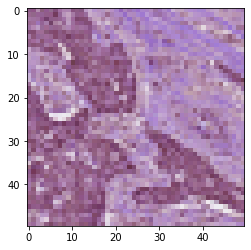

In [12]:
img = cv2.imread(cancer_image_path+'/9023_idx5_x1401_y1351_class1.png')
print(img.shape)
plt.imshow(img)

In [13]:
def load_images(dir_path):
    images = []
    for filename in os.listdir(dir_path):
        # Load the image using OpenCV
        img = cv2.imread(os.path.join(dir_path, filename))
        # Convert the image to RGB format
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # Append the image to the list
        images.append(img)
    return images

cancer_images = load_images(cancer_image_path)
non_cancer_images = load_images(non_cancer_image_path)

In [14]:
# Concatenate the two lists of images
images = cancer_images + non_cancer_images

# Convert the list of images to a numpy array
images = np.array(images)

# Define the labels for the two classes
labels = [1] * len(cancer_images) + [0] * len(non_cancer_images)

# Convert the labels to a numpy array
labels = np.array(labels)

# # Split the data into training and validation sets
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(images, labels, test_size=0.2)

In [15]:
# Normalize the data
x_train = x_train.astype('float32') / 255
x_val = x_val.astype('float32') / 255

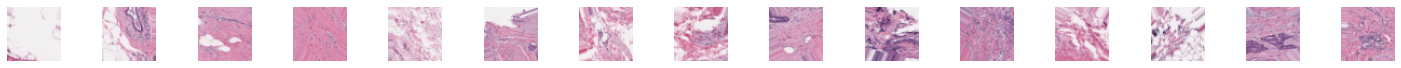

In [16]:
datagen = ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=40.)
 
datagen.fit(x_train)
# for X_batch, y_batch in
 
batches = datagen.flow(x_train, y_train, batch_size = 50)
X_batch, y_batch = next(batches)
 
fig, axs = plt.subplots(1, 15, figsize=(20, 5))
fig.tight_layout()
 
for i in range(15):
    axs[i].imshow(X_batch[i].reshape(50, 50, 3))
    axs[i].axis("off")


In [17]:
# print(X_batch.shape)

In [27]:
def LeNet_Model():
    model = Sequential()
    model.add(Conv2D(60, (5, 5), padding = 'same', input_shape=(50, 50, 3), activation='relu'))
    model.add(Conv2D(60, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(60, (5, 5), padding = 'same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # model.add(Conv2D(30, (3, 3), padding = 'same', activation='relu'))
    # model.add(Conv2D(30, (3, 3), padding = 'same', activation='relu'))
    # model.add(Dropout(0.5))
    # model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(512, activation='relu'))
    #model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(Adam(lr = 0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [42]:
model = LeNet_Model()
print(model.summary())
# history = model.fit(x_train, y_train, validation_data= (x_val, y_val), epochs=1, verbose=1, shuffle = 1)
# history = model.fit(x_train, y_train, validation_data= (x_val, y_val), epochs=100, verbose=1, shuffle = 1)
# history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=48),
#                            steps_per_epoch=len(x_train), validation_data=(x_val, y_val), epochs=1, verbose=1, shuffle = 1)
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
                            steps_per_epoch=len(x_train)//31, validation_data=(x_val, y_val), epochs=30, verbose=1, shuffle = 1)


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_51 (Conv2D)          (None, 50, 50, 60)        4560      
                                                                 
 conv2d_52 (Conv2D)          (None, 46, 46, 60)        90060     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 23, 23, 60)       0         
 g2D)                                                            
                                                                 
 conv2d_53 (Conv2D)          (None, 23, 23, 60)        90060     
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 11, 11, 60)       0         
 g2D)                                                            
                                                                 
 flatten_15 (Flatten)        (None, 7260)            

<ipython-input-42-88cebd3a0e4b>:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),


Epoch 1/30
22/22 [==============================] - 2s 66ms/step - loss: 0.6786 - accuracy: 0.6422 - val_loss: 0.6013 - val_accuracy: 0.6800
Epoch 2/30
22/22 [==============================] - 1s 41ms/step - loss: 0.5855 - accuracy: 0.6667 - val_loss: 0.5173 - val_accuracy: 0.6800
Epoch 3/30
22/22 [==============================] - 1s 33ms/step - loss: 0.6170 - accuracy: 0.5172 - val_loss: 0.6932 - val_accuracy: 0.3200
Epoch 4/30
22/22 [==============================] - 1s 35ms/step - loss: 0.6848 - accuracy: 0.6624 - val_loss: 0.6534 - val_accuracy: 0.7086
Epoch 5/30
22/22 [==============================] - 1s 33ms/step - loss: 0.6396 - accuracy: 0.6466 - val_loss: 0.6172 - val_accuracy: 0.6800
Epoch 6/30
22/22 [==============================] - 1s 35ms/step - loss: 0.6082 - accuracy: 0.6667 - val_loss: 0.5702 - val_accuracy: 0.6800
Epoch 7/30
22/22 [==============================] - 1s 33ms/step - loss: 0.5484 - accuracy: 0.6667 - val_loss: 0.4457 - val_accuracy: 0.6971
Epoch 8/30
22

Text(0.5, 0, 'epoch')

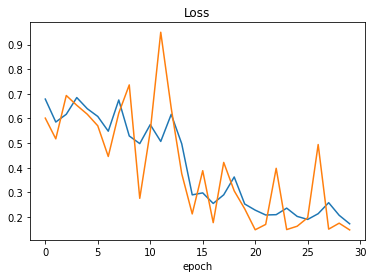

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')